![Renfe](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Proyecto final - Data Analytics y Business Intelligence

Recibimos dos datasets:

1. `renfe.csv`: Información de búsquedas de billetes que se hicieron en la página de Renfe.
2. `coordenadas_ciudades.csv`: Latitud y longitud de provincias españolas.

Queremos usar estos datasets para un modelo de Machine Learning que utilizaremos para predecir los precios de los billetes. Y, para ello, necesitamos limpiar, explorar y pre-procesar el dataset.

## Reglas de juego

1. El proyecto se debe entregar en grupos de dos o individualmente.
2. Cada respuesta correcta suma un punto.
3. La calificación final consistirá en la suma de todos los puntos obtenidos sobre el total de puntos posibles.


## Diccionario de datos

Esta es la información provista:

### `renfe.csv`
- `FECHA_CONSULTA`: Fecha en la que se consultó la página.
- `FECHA_INICIO`: Fecha de inicio del trayecto.
- `FECHA_FIN`: Fecha de finalización del trayecto.
- `CIUDAD_ORIGEN`: Ciudad de origen del trayecto.
- `CIUDAD_DESTINO`: Ciudad destino del trayecto.
- `TIPO_TREN`: Tipo de tren.
- `TIPO_TARIFA`: Tipo de tarifa del billete.
- `CLASE`: Clase del asiento seleccionado.
- `PRECIO`: Precio del tren seleccionado.

### `coordenadas_ciudades.csv`
- `ciudad`: Nombre de la ciudad.
- `latitud`: Coordenada de latitud de la ciudad.
- `longitud`: Coordenada de longitud de la ciudad.

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import datetime as dt
import plotly.io as pio
from google.colab import drive
drive.mount('/content/drive')

# Configurar el tema globalmente
pio.templates.default = 'plotly_dark'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## P0: Lee el dataset `renfe.csv`

In [2]:
df = pd.read_csv("/content/drive/MyDrive/renfe.csv",sep=";")

## P1: Visualiza las primeras y las últimas filas del dataset

In [3]:
df.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [4]:
df.tail()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30
383567,2019-05-27 15:04:14,2019-06-16 18:35:00,2019-06-16 20:21:00,VALENCIA,MADRID,AVE,Flexible,Turista,73.10


## P2: ¿Cuantas filas y columnas tiene el dataset?

In [5]:
# Guardo en una tupla el tamaño del dataset.
tupla_df = df.shape
print(f"El Dataset tiene {tupla_df[0]} filas y {tupla_df[1]} columnas")

El Dataset tiene 383568 filas y 9 columnas


## P3: Cambia los nombres de todas las columnas a minúsculas

In [6]:
# Cambio el nombre de las columnas con el metodo lower.

df.columns = df.columns.str.lower()


In [7]:
df

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75
...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30


## P4: Muestra los tipos de datos de cada columna

In [8]:
# Con el metodo .info muestro la informacion de los tipos de dato de las columnas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fecha_consulta  383568 non-null  object 
 1   fecha_inicio    383568 non-null  object 
 2   fecha_fin       383568 non-null  object 
 3   ciudad_origen   383568 non-null  object 
 4   ciudad_destino  383568 non-null  object 
 5   tipo_tren       383568 non-null  object 
 6   tipo_tarifa     382225 non-null  object 
 7   clase           382225 non-null  object 
 8   precio          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


## P5: Cambia los tipos de datos que creas que creas incorrectos, por los tipos adecuados

In [9]:
# Con el metodo .assign cambio a tipo fecha las columnas "fecha_consulta","fecha_inicio" y " fecha_fin"
df = df.assign(
    fecha_consulta=pd.to_datetime(df['fecha_consulta']),
    fecha_inicio=pd.to_datetime(df['fecha_inicio']),
    fecha_fin=pd.to_datetime(df['fecha_fin']))

In [10]:
# Compruebo si se ha cambiado.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fecha_consulta  383568 non-null  datetime64[ns]
 1   fecha_inicio    383568 non-null  datetime64[ns]
 2   fecha_fin       383568 non-null  datetime64[ns]
 3   ciudad_origen   383568 non-null  object        
 4   ciudad_destino  383568 non-null  object        
 5   tipo_tren       383568 non-null  object        
 6   tipo_tarifa     382225 non-null  object        
 7   clase           382225 non-null  object        
 8   precio          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 26.3+ MB


In [11]:
# Compruebo que al cambiar el tipo de variable no se a modificado nada
df

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75
...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30


In [12]:
# Compruebo que la columna precio no tiene ningun dato atipico.

df.precio.describe()

count    355038.000000
mean         61.435380
std          25.695934
min           0.000000
25%          41.200000
50%          58.150000
75%          76.300000
max         342.800000
Name: precio, dtype: float64

In [13]:
# Decido cambiar a float32 para ser mas eficiente.

df.precio = df.precio.astype("float32")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fecha_consulta  383568 non-null  datetime64[ns]
 1   fecha_inicio    383568 non-null  datetime64[ns]
 2   fecha_fin       383568 non-null  datetime64[ns]
 3   ciudad_origen   383568 non-null  object        
 4   ciudad_destino  383568 non-null  object        
 5   tipo_tren       383568 non-null  object        
 6   tipo_tarifa     382225 non-null  object        
 7   clase           382225 non-null  object        
 8   precio          355038 non-null  float32       
dtypes: datetime64[ns](3), float32(1), object(5)
memory usage: 24.9+ MB


## P6: Filas duplicadas

In [15]:
df[df.duplicated(keep=False)]

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
8530,2019-06-10 01:10:54,2019-07-07 21:03:00,2019-07-07 23:28:00,VALENCIA,MADRID,INTERCITY,Promo,Turista,43.750000
9179,2019-08-17 03:22:19,2019-09-01 21:03:00,2019-09-01 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,NaN
14256,2019-05-03 05:33:32,2019-05-24 15:10:00,2019-05-24 17:20:00,MADRID,VALENCIA,INTERCITY,Promo,Turista,43.750000
24392,2019-05-15 21:26:30,2019-06-23 21:05:00,2019-06-23 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
29786,2019-05-13 05:35:59,2019-05-26 17:30:00,2019-05-26 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.400002
...,...,...,...,...,...,...,...,...,...
356200,2019-05-03 15:18:26,2019-05-24 15:10:00,2019-05-24 17:20:00,MADRID,VALENCIA,INTERCITY,Promo,Turista,43.750000
362709,2019-06-22 07:11:59,2019-07-03 21:03:00,2019-07-03 23:28:00,VALENCIA,MADRID,INTERCITY,Promo,Turista,29.900000
372763,2019-08-16 05:36:33,2019-08-16 21:03:00,2019-08-16 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.400002
376617,2019-05-17 15:22:08,2019-07-11 21:03:00,2019-07-11 23:28:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN


### P6.1: ¿Cuántas filas duplicadas tiene el dataset?

In [16]:
df.duplicated().sum()

33

### P6.2: Quita las filas duplicadas

In [17]:
df = df.drop_duplicates()

In [18]:
df[df.duplicated()]

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio


## P7: Valores nulos y análisis de `precio`

### P7.1: ¿Que porcentaje de valores nulos hay por cada columna?

In [19]:
df.isna().mean() * 100

fecha_consulta    0.000000
fecha_inicio      0.000000
fecha_fin         0.000000
ciudad_origen     0.000000
ciudad_destino    0.000000
tipo_tren         0.000000
tipo_tarifa       0.348860
clase             0.348860
precio            7.434784
dtype: float64

### P7.2: ¿Cual es el mínimo, percentiles importantes (25%, 50%, 75%) y el máximo de `precio`?

In [20]:
df.precio.describe()

count    355020.000000
mean         61.436161
std          25.696217
min           0.000000
25%          41.200001
50%          58.150002
75%          76.300003
max         342.799988
Name: precio, dtype: float64

### P7.3: ¿Hay algo raro en el valor mínimo de `precio`? Quita las filas con ese valor del dataset

In [21]:
# Compruebo el precio minimo de los billetes y veo que hay 2 filas que tienen valor 0.
df[df.precio == 0]

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
121961,2019-06-17 09:01:21,2019-08-03 20:00:00,2019-08-03 23:10:00,BARCELONA,MADRID,AVE,4x100,Turista,0.0
136925,2019-06-13 01:13:29,2019-06-16 12:50:00,2019-06-16 15:45:00,BARCELONA,MADRID,AVE-TGV,Flexible,Preferente,0.0


In [22]:
# Borramos las filas con valor 0.
df = df.drop(df[df.precio == 0].index)

In [23]:
# Compruebo que se han borrado.
df[df.precio == 0]

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio


### P7.4: Reemplaza los valores nulos en `precio` por la media de esa columna

In [24]:
df.precio.mean()

61.4365

In [25]:
df.precio.isna().sum()

28515

In [26]:
df.precio[df.precio.isna()] = df.precio.mean()

<ipython-input-26-95f1cf1afbec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.precio[df.precio.isna()] = df.precio.mean()


In [27]:
# Ya que el precio normalmente solo usamos 2 decimales decido redondear toda la columna a dos decimales.

df['precio'] = df['precio'].apply(lambda x: round(x, 2))

In [28]:
df

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75
...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30


In [29]:
df.precio.describe()

count    383533.000000
mean         61.436767
std          24.722205
min          12.850000
25%          43.250000
50%          60.300000
75%          76.300000
max         342.800000
Name: precio, dtype: float64

### P7.5: Quita las filas donde `clase` o `tipo_tarifa` sean nulos

In [30]:
df = df.dropna(subset=['clase'])

In [31]:
df.clase.unique()

array(['Turista', 'Preferente', 'Turista con enlace', 'Turista Plus',
       'TuristaSólo plaza H', 'PreferenteSólo plaza H', 'Cama Turista',
       'Cama G. Clase', 'Turista PlusSólo plaza H'], dtype=object)

In [32]:
df.clase.isna().sum()

0

In [33]:
df.tipo_tarifa.isna().sum()

0

In [34]:
df.tipo_tarifa.unique()

array(['Flexible', 'Promo', 'Adulto ida', 'Promo +', 'COD.PROMOCIONAL',
       'Mesa', 'Individual-Flexible', 'Grupos Ida',
       'Doble Familiar-Flexible'], dtype=object)

## P8: Tiempo de viaje

### P8.1: Calcula el tiempo de viaje en minutos (fecha_fin - fecha_inicio)

In [35]:
df["tiempo_viaje"] = ((df["fecha_fin"] - df["fecha_inicio"]).dt.total_seconds() / 60).astype(int)

<ipython-input-35-47b0ab5db839>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tiempo_viaje"] = ((df["fecha_fin"] - df["fecha_inicio"]).dt.total_seconds() / 60).astype(int)


In [36]:
df

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179
...,...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,109
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,190
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80,100
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30,141


### P8.2: Haz un histograma de la variable que acabas de crear (`tiempo_de_viaje`)

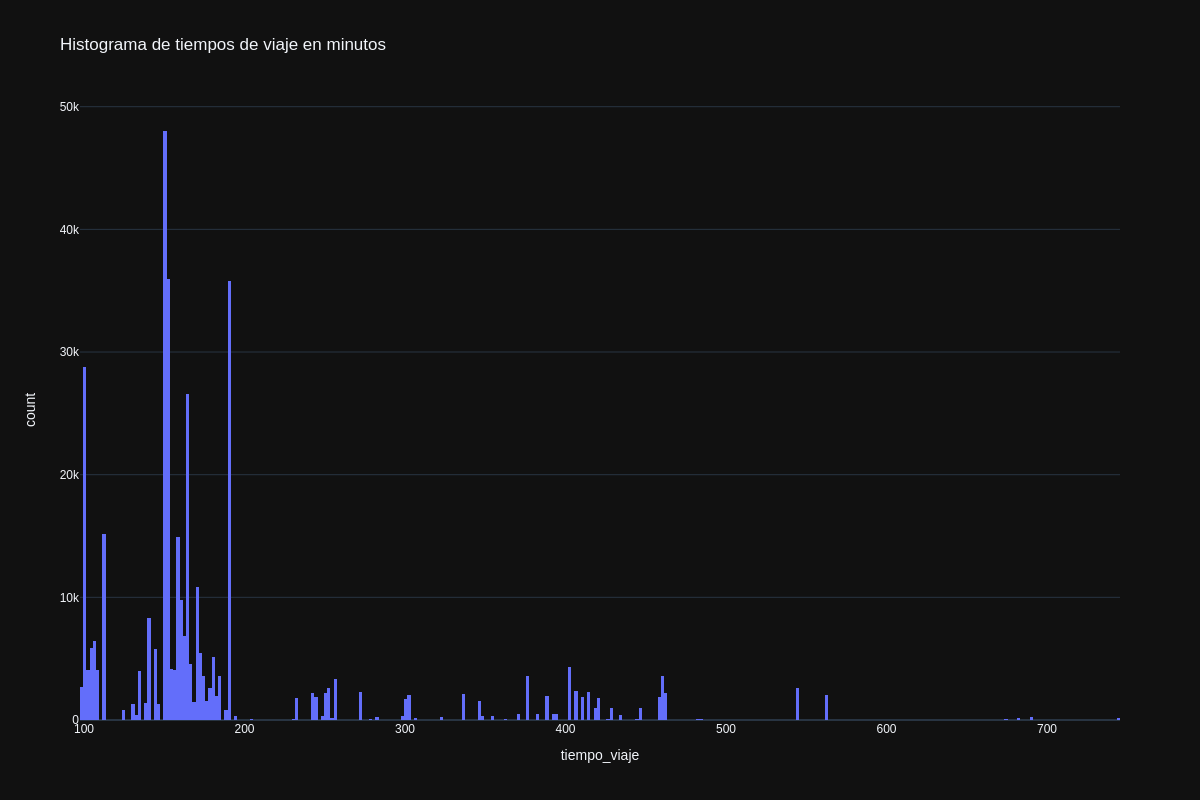

In [38]:
# Crear histograma
fig = px.histogram(df, x='tiempo_viaje', title='Histograma de tiempos de viaje en minutos',
                height=800,
                width=1200)

# Mostrar el histograma
fig.show("png")

Aunque si que podemos ver que la mayoria de viajes son de menos de 200 minutos.La visualizacion en este tipo de grafico no me acaba de convencer, veo la grafica demasiado dispersa, intento probar diferentes graficos para ver si puedo ver mejor esta ditribucion de datos.

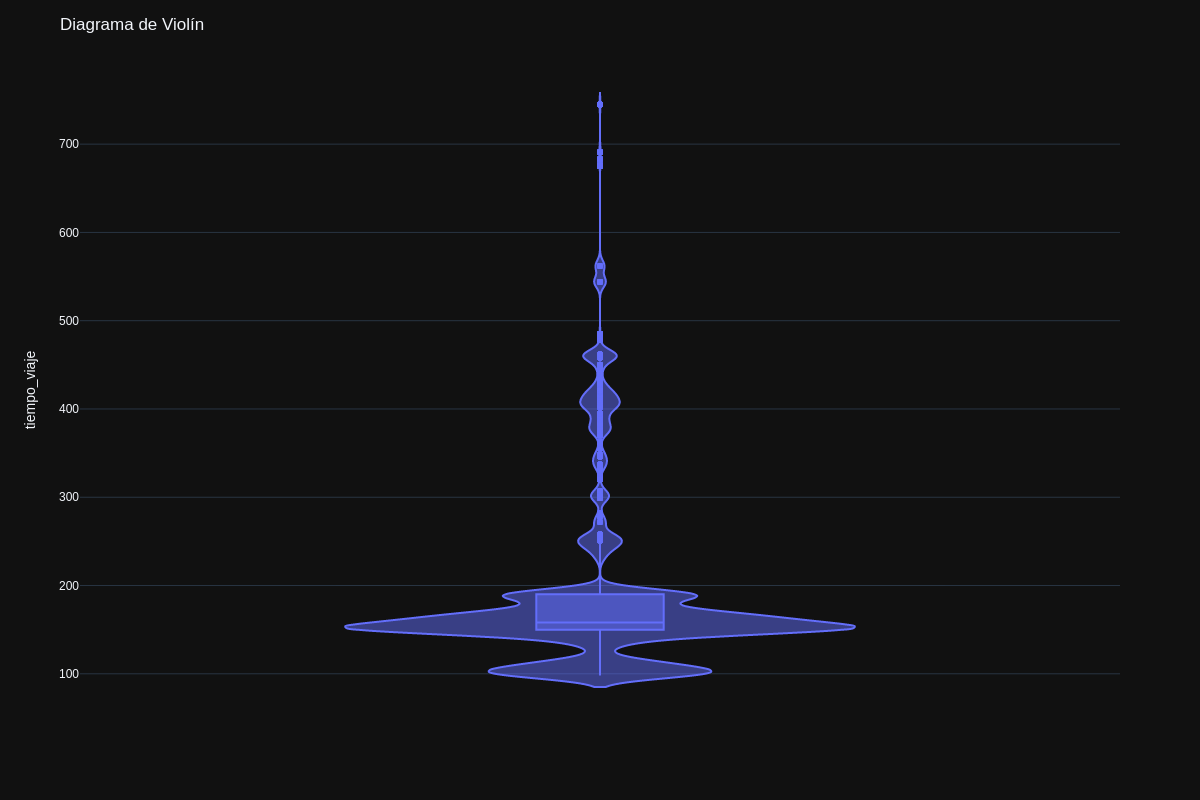

In [39]:
# Crear el diagrama de violín usando Plotly
fig = px.violin(df, y='tiempo_viaje', box=True,
            height=800,
            width=1200)
fig.update_layout(title='Diagrama de Violín')
fig.show("png")

In [40]:
df[df.tiempo_viaje > 700]

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje
1100,2019-04-20 13:19:20,2019-05-18 08:45:00,2019-05-18 21:10:00,SEVILLA,MADRID,MD,Flexible,Turista con enlace,52.5,745
2418,2019-05-10 11:20:02,2019-05-26 08:45:00,2019-05-26 21:10:00,SEVILLA,MADRID,MD,Flexible,Turista con enlace,52.5,745
5070,2019-04-21 01:29:38,2019-05-26 08:45:00,2019-05-26 21:10:00,SEVILLA,MADRID,MD,Flexible,Turista con enlace,52.5,745
7069,2019-05-17 07:35:11,2019-06-02 08:45:00,2019-06-02 21:10:00,SEVILLA,MADRID,MD,Flexible,Turista con enlace,52.5,745
12086,2019-04-17 01:44:54,2019-05-26 08:45:00,2019-05-26 21:10:00,SEVILLA,MADRID,MD,Flexible,Turista con enlace,52.5,745
...,...,...,...,...,...,...,...,...,...,...
375881,2019-04-21 15:11:23,2019-05-11 08:45:00,2019-05-11 21:10:00,SEVILLA,MADRID,MD,Flexible,Turista con enlace,52.5,745
378101,2019-05-15 03:39:01,2019-05-18 08:45:00,2019-05-18 21:10:00,SEVILLA,MADRID,MD,Flexible,Turista con enlace,52.5,745
379825,2019-05-08 09:35:10,2019-05-25 08:45:00,2019-05-25 21:10:00,SEVILLA,MADRID,MD,Flexible,Turista con enlace,52.5,745
380194,2019-04-21 12:42:04,2019-06-02 08:45:00,2019-06-02 21:10:00,SEVILLA,MADRID,MD,Flexible,Turista con enlace,52.5,745


## P9: Extrae el día, el nombre del día, el mes y la hora de `fecha_inicio`

In [41]:
# Creo una nueva columna llamada dia_mes para extraer el dia.
df['dia_mes'] = df['fecha_inicio'].dt.day

<ipython-input-41-35538325b143>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
df

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179,26
...,...,...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,109,10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,190,5
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80,100,29
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30,141,7


In [43]:
# Creo una nueva columna llamada mes con el mes y el año.

df['mes'] = df['fecha_inicio'].dt.month_name()

<ipython-input-43-a6285ff21c56>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
df

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes,mes
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28,June
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14,July
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23,May
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29,May
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179,26,June
...,...,...,...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,109,10,May
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,190,5,August
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80,100,29,April
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30,141,7,July


In [45]:
# Creo una nueva columna llamada nombre_dia con el dia de la semana.

df['nombre_dia'] = df['fecha_inicio'].dt.day_name()

<ipython-input-45-e885a53939db>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
df

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes,mes,nombre_dia
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28,June,Friday
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14,July,Sunday
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23,May,Thursday
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29,May,Wednesday
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179,26,June,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,109,10,May,Friday
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,190,5,August,Monday
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80,100,29,April,Monday
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30,141,7,July,Sunday


In [47]:
# Creo una nueva columna llamada hora_minuto, con la hora y el minuto.
df['hora_minuto'] = df['fecha_inicio'].dt.strftime('%H:%M')

<ipython-input-47-2b79bd73ff35>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes,mes,nombre_dia,hora_minuto
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28,June,Friday,20:36
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14,July,Sunday,10:00
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23,May,Thursday,13:40
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29,May,Wednesday,14:50
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179,26,June,Wednesday,13:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,109,10,May,Friday,19:40
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,190,5,August,Monday,20:00
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80,100,29,April,Monday,16:15
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30,141,7,July,Sunday,15:00


## P10: Quita las columnas `fecha_consulta`, `fecha_inicio` y `fecha_fin` del dataset

In [49]:
# Compruebo que borra bien las columnas que no quiero.

df.drop(['fecha_consulta', 'fecha_inicio','fecha_fin'], axis=1)

,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes,mes,nombre_dia,hora_minuto
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28,June,Friday,20:36
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14,July,Sunday,10:00
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23,May,Thursday,13:40
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29,May,Wednesday,14:50
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179,26,June,Wednesday,13:25
...,...,...,...,...,...,...,...,...,...,...,...
383563,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,109,10,May,Friday,19:40
383564,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,190,5,August,Monday,20:00
383565,VALENCIA,MADRID,AVE,Promo,Turista,27.80,100,29,April,Monday,16:15
383566,MADRID,SEVILLA,AVE,Promo,Turista,47.30,141,7,July,Sunday,15:00


In [50]:
#  Guardo el dataframe sin las columnas.

df = df.drop(['fecha_consulta', 'fecha_inicio','fecha_fin'], axis=1)

In [51]:
df

,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes,mes,nombre_dia,hora_minuto
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28,June,Friday,20:36
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14,July,Sunday,10:00
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23,May,Thursday,13:40
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29,May,Wednesday,14:50
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179,26,June,Wednesday,13:25
...,...,...,...,...,...,...,...,...,...,...,...
383563,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,109,10,May,Friday,19:40
383564,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,190,5,August,Monday,20:00
383565,VALENCIA,MADRID,AVE,Promo,Turista,27.80,100,29,April,Monday,16:15
383566,MADRID,SEVILLA,AVE,Promo,Turista,47.30,141,7,July,Sunday,15:00


## P11: Lee el dataset `coordenadas_ciudades.csv` y únelo con al dataset que has procesado hasta ahora (utiliza `ciudad_destino` para el `join`)

In [53]:
# Leo el archivo coordenadas_ciudades.csv.

df_co = pd.read_csv("/content/drive/MyDrive/coordenadas_ciudades.csv")

In [54]:
df_co

,ciudad,latitud,longitud
0,MADRID,40.416705,-3.703582
1,BARCELONA,41.382894,2.177432
2,SEVILLA,37.388630,-5.995340
3,VALENCIA,39.469901,-0.375951
4,PONFERRADA,42.545412,-6.593872


In [55]:
# Realizo un join utilizando el método merge() especificando las columnas correspondientes para la unión.
# Utilizo how='inner' para realizar una unión interna, que solo incluye las filas con coincidencias en ambas tablas

pd.merge(df, df_co, left_on='ciudad_destino', right_on='ciudad', how='inner')

,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes,mes,nombre_dia,hora_minuto,ciudad,latitud,longitud
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28,June,Friday,20:36,MADRID,40.416705,-3.703582
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14,July,Sunday,10:00,MADRID,40.416705,-3.703582
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23,May,Thursday,13:40,MADRID,40.416705,-3.703582
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29,May,Wednesday,14:50,MADRID,40.416705,-3.703582
4,SEVILLA,MADRID,AVE,Promo,Turista,60.30,150,21,July,Sunday,08:45,MADRID,40.416705,-3.703582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382190,MADRID,PONFERRADA,AVE-LD,Promo,Turista con enlace,31.20,252,4,June,Tuesday,14:40,PONFERRADA,42.545412,-6.593872
382191,MADRID,PONFERRADA,ALVIA,Promo,Turista,33.50,243,22,July,Monday,17:30,PONFERRADA,42.545412,-6.593872
382192,MADRID,PONFERRADA,AVE-LD,Promo,Turista con enlace,37.45,252,22,May,Wednesday,14:40,PONFERRADA,42.545412,-6.593872
382193,MADRID,PONFERRADA,LD,Flexible,Turista con enlace,57.00,252,27,July,Saturday,14:40,PONFERRADA,42.545412,-6.593872


In [56]:
df = pd.merge(df, df_co, left_on='ciudad_destino', right_on='ciudad', how='inner')

In [57]:
# Decido eliminar la columna ciudad ya que tiene datos duplicados con la columna ciudad_destino.

df = df.drop(columns=['ciudad'])

In [58]:
df

,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes,mes,nombre_dia,hora_minuto,latitud,longitud
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28,June,Friday,20:36,40.416705,-3.703582
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14,July,Sunday,10:00,40.416705,-3.703582
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23,May,Thursday,13:40,40.416705,-3.703582
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29,May,Wednesday,14:50,40.416705,-3.703582
4,SEVILLA,MADRID,AVE,Promo,Turista,60.30,150,21,July,Sunday,08:45,40.416705,-3.703582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382190,MADRID,PONFERRADA,AVE-LD,Promo,Turista con enlace,31.20,252,4,June,Tuesday,14:40,42.545412,-6.593872
382191,MADRID,PONFERRADA,ALVIA,Promo,Turista,33.50,243,22,July,Monday,17:30,42.545412,-6.593872
382192,MADRID,PONFERRADA,AVE-LD,Promo,Turista con enlace,37.45,252,22,May,Wednesday,14:40,42.545412,-6.593872
382193,MADRID,PONFERRADA,LD,Flexible,Turista con enlace,57.00,252,27,July,Saturday,14:40,42.545412,-6.593872


## P12: Gráfica en un mapa el precio medio por ciudad de destino

In [59]:
# Primero calculamos la media de precio agrupando por ciudad de destino.
# Luego, agregamos las coordenadas de cada ciudad a un DataFrame.
# Redonde el resultado con dos decimales.

df_media = df.groupby('ciudad_destino').agg({
    'latitud': 'first',
    'longitud': 'first',
    'precio': 'mean'
}).reset_index()
df_media['precio'] = df_media['precio'].round(2)

In [60]:
df_media

,ciudad_destino,latitud,longitud,precio
0,BARCELONA,41.382894,2.177432,85.36
1,MADRID,40.416705,-3.703582,60.70
2,PONFERRADA,42.545412,-6.593872,45.65
3,SEVILLA,37.388630,-5.995340,58.82
4,VALENCIA,39.469901,-0.375951,42.64


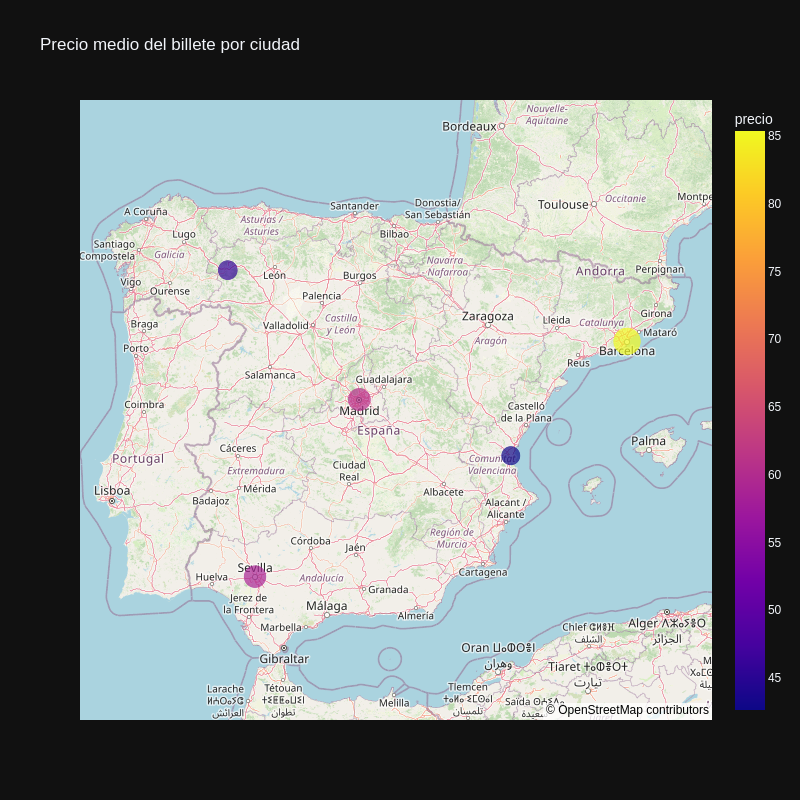

In [61]:
# Creo el mapa con plotly.

fig = px.scatter_mapbox(
    df_media,
    lat='latitud',
    lon='longitud',
    size='precio',  # Tamaño del punto basado en el precio medio
    color='precio',  # Color del punto basado en el precio medio
    hover_name='ciudad_destino',
    hover_data={'precio': True},
    zoom=5,
    mapbox_style='open-street-map',
    title='Precio medio del billete por ciudad',
    width=800,  # Ancho del gráfico
    height=800  # Alto del gráfico
)
fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>Precio Medio: %{customdata[0]:.2f}€<extra></extra>",
    customdata=df_media[['precio']],
    hovertext=df_media['ciudad_destino']
)


fig.show("png")

En este caso vemos que el precio medio mas caro seria el destino de Barcelona, y el mas barato Valencia.

## P13: Haz una tabla de correlación, ¿hay variables númericas correladas con el precio?

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382195 entries, 0 to 382194
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ciudad_origen   382195 non-null  object 
 1   ciudad_destino  382195 non-null  object 
 2   tipo_tren       382195 non-null  object 
 3   tipo_tarifa     382195 non-null  object 
 4   clase           382195 non-null  object 
 5   precio          382195 non-null  float64
 6   tiempo_viaje    382195 non-null  int64  
 7   dia_mes         382195 non-null  int32  
 8   mes             382195 non-null  object 
 9   nombre_dia      382195 non-null  object 
 10  hora_minuto     382195 non-null  object 
 11  latitud         382195 non-null  float64
 12  longitud        382195 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 36.4+ MB


In [63]:
# Creo un dataframe con los datos numericos

df_numerico = df.select_dtypes(include=['number'])

In [64]:
# Creo otro dataframe con las correlaciones de las variables numericas.

correlation_matrix = df_numerico.corr()

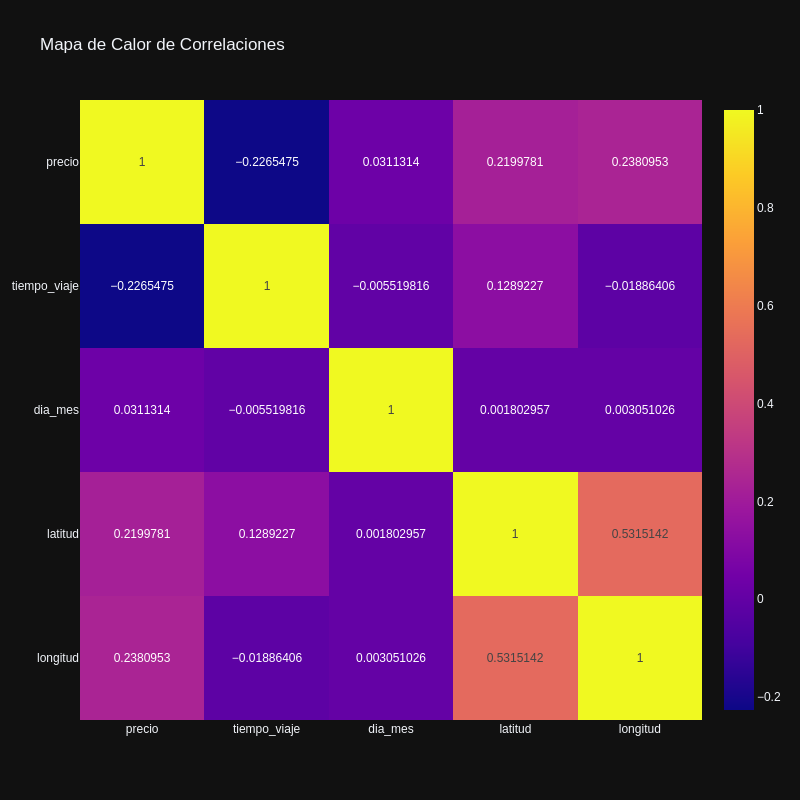

In [65]:
# Crear el heatmap con Plotly.
fig = px.imshow(correlation_matrix,
                width = 800,
                height = 800,
                text_auto=True,
                aspect="auto",
                title='Mapa de Calor de Correlaciones')

# Mostrar el heatmap
fig.show("png")

Como podemos ver en la matriz, las dos unicas variables que tiene algo de correlacion con el precio son latitud y longitud y no demasiado.

## P14: Relación entre variables del dataset y `precio`

### P14.1: Haz un scatter plot de precio vs. tiempo de viaje

In [66]:
df

,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes,mes,nombre_dia,hora_minuto,latitud,longitud
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28,June,Friday,20:36,40.416705,-3.703582
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14,July,Sunday,10:00,40.416705,-3.703582
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23,May,Thursday,13:40,40.416705,-3.703582
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29,May,Wednesday,14:50,40.416705,-3.703582
4,SEVILLA,MADRID,AVE,Promo,Turista,60.30,150,21,July,Sunday,08:45,40.416705,-3.703582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382190,MADRID,PONFERRADA,AVE-LD,Promo,Turista con enlace,31.20,252,4,June,Tuesday,14:40,42.545412,-6.593872
382191,MADRID,PONFERRADA,ALVIA,Promo,Turista,33.50,243,22,July,Monday,17:30,42.545412,-6.593872
382192,MADRID,PONFERRADA,AVE-LD,Promo,Turista con enlace,37.45,252,22,May,Wednesday,14:40,42.545412,-6.593872
382193,MADRID,PONFERRADA,LD,Flexible,Turista con enlace,57.00,252,27,July,Saturday,14:40,42.545412,-6.593872


In [67]:
correlation_matrix

,precio,tiempo_viaje,dia_mes,latitud,longitud
precio,1.000000,-0.226548,0.031131,0.219978,0.238095
tiempo_viaje,-0.226548,1.000000,-0.005520,0.128923,-0.018864
dia_mes,0.031131,-0.005520,1.000000,0.001803,0.003051
latitud,0.219978,0.128923,0.001803,1.000000,0.531514
longitud,0.238095,-0.018864,0.003051,0.531514,1.000000


In [68]:
correlacion = correlation_matrix.loc["precio","tiempo_viaje"]

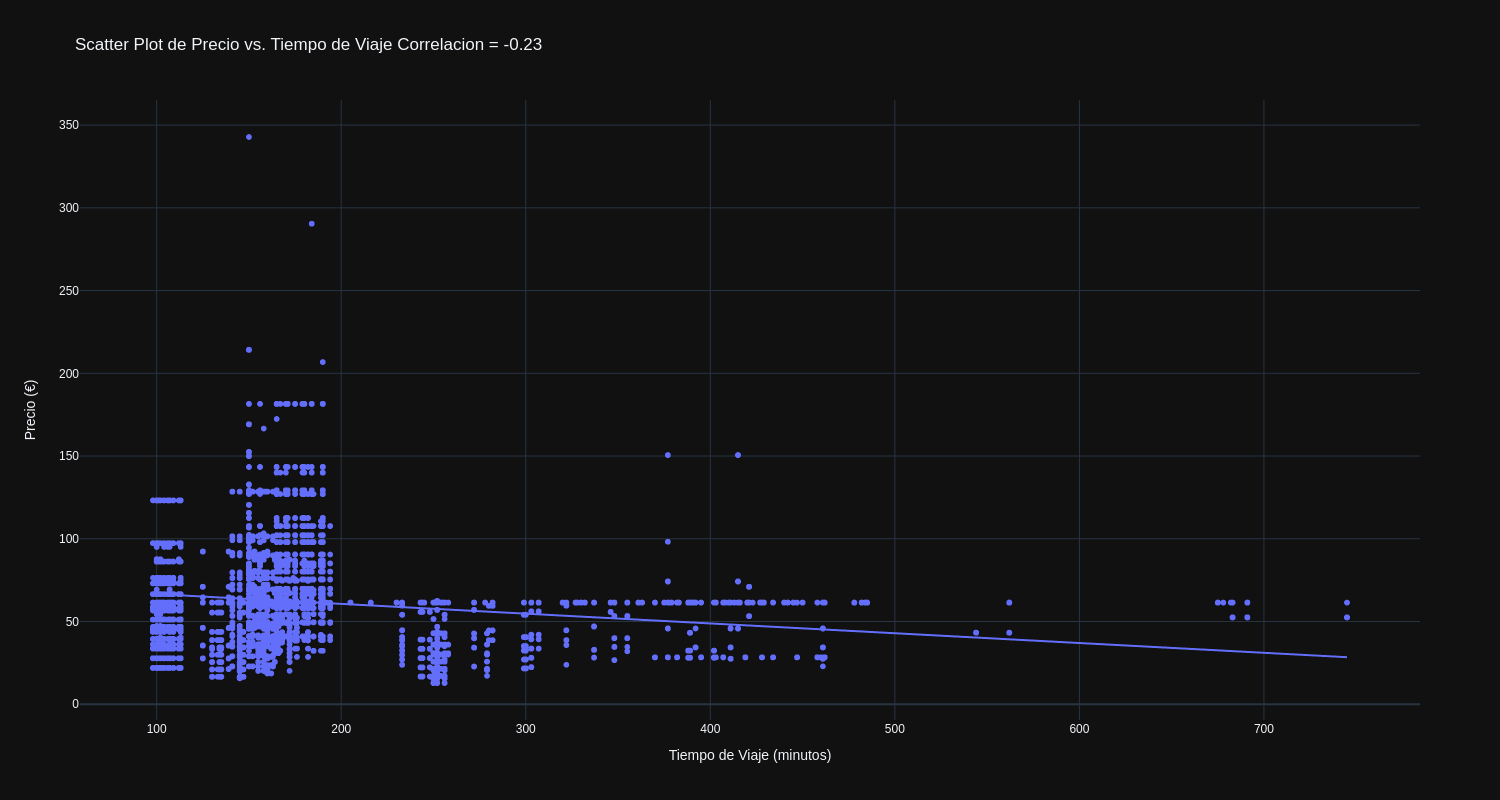

In [69]:
# Crear el scatter plot con Plotly
fig = px.scatter(df, x ='tiempo_viaje', y ='precio',
                 title=f'Scatter Plot de Precio vs. Tiempo de Viaje Correlacion = {correlacion:.2f}',
                 labels={'tiempo_viaje': 'Tiempo de Viaje (minutos)', 'precio': 'Precio (€)'},
                 hover_data=['ciudad_origen', 'ciudad_destino', 'tipo_tarifa', 'precio'],
                 trendline= "ols",
                 width = 1500,
                 height = 800,)

# Mostrar el scatter plot
fig.show("png")

Con este scatter plot podemos ver como la relacion entre precio y tiempo tiende hacia abajo pero es poco pronunciada ya nos lo adelantaba la correlacion del mapa del punto anterior.
Voy a crear un segundo scatter plot diferenciado por tipo de tarifa para ver si subdividiendo la masa de puntos, podemos diferenciar esa realcion.


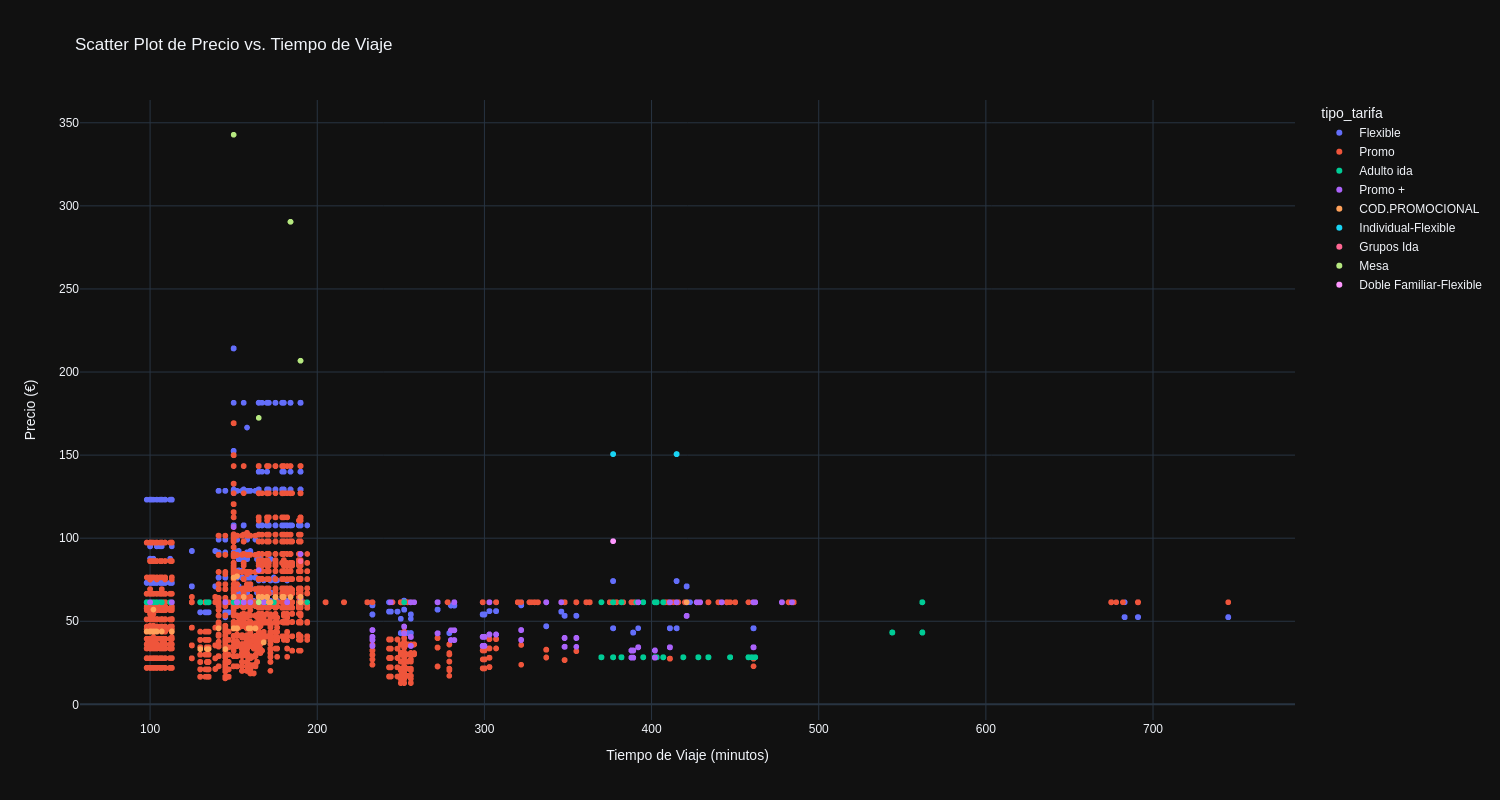

In [70]:
# Crear el scatter plot con Plotly
fig = px.scatter(df, x='tiempo_viaje', y='precio',
                 title='Scatter Plot de Precio vs. Tiempo de Viaje',
                 labels={'tiempo_viaje': 'Tiempo de Viaje (minutos)', 'precio': 'Precio (€)'},
                 color='tipo_tarifa',
                 hover_data=['ciudad_origen', 'ciudad_destino', 'tipo_tarifa', 'precio','tipo_tren'],
                 width = 1500,
                 height = 800,)

# Mostrar el scatter plot
fig.show("png")

En este segundo grafico, aprobechando la opcion de diferenciar los puntos por colores, por una variable categorica, podemos sacar alguna conclusion sobre el tipo de tarifa y el precio, sobreto que los precios mas baratos se tratan de billetes Promo, y que los atipicos con precios muy altos con billetes de tipo Mesa, que por lo que puedo deducir del precio tan alto se refieren a billetes que reservan una mesa completa para 4 pasajeros.

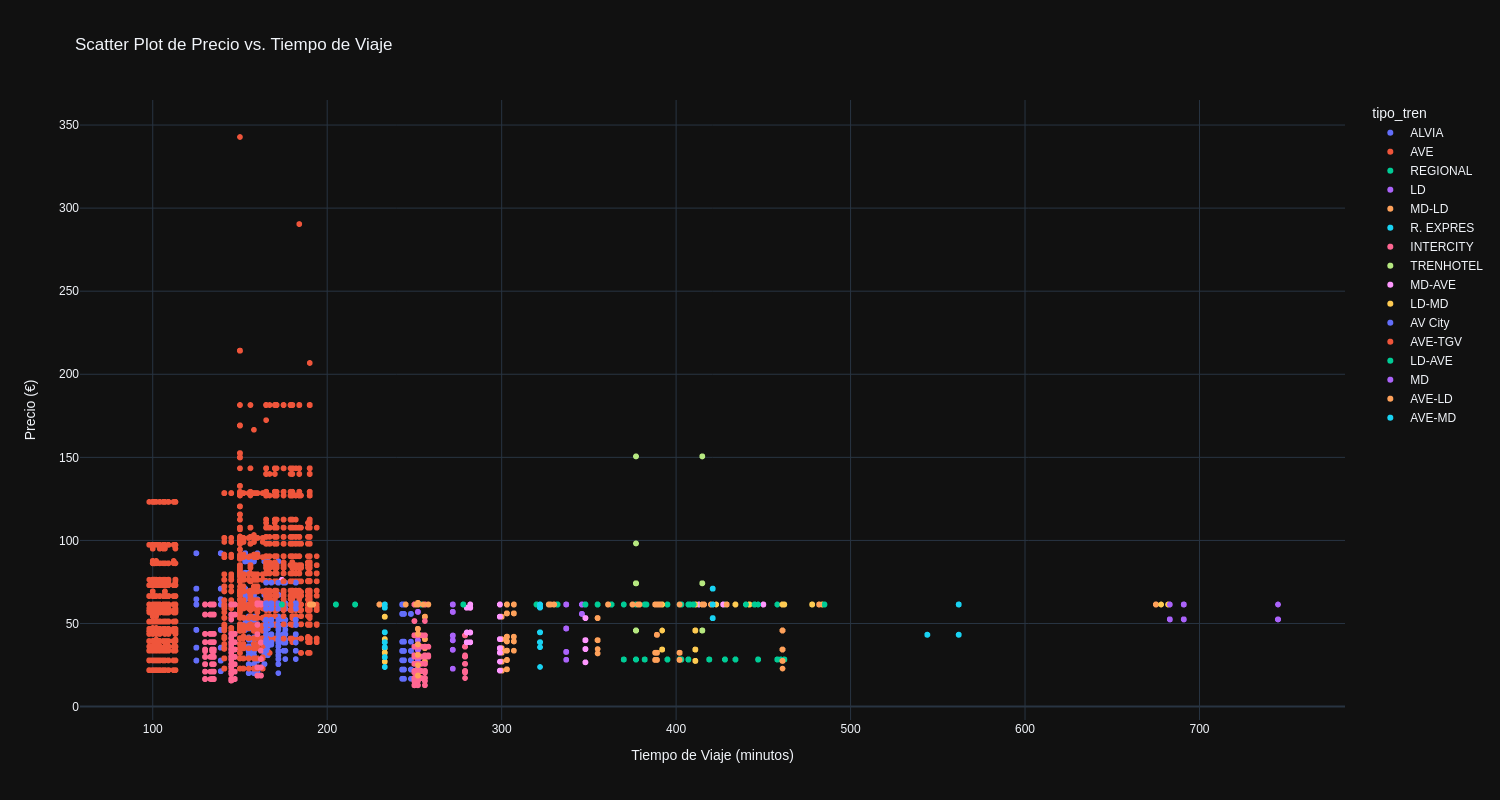

In [71]:
# Crear el scatter plot con Plotly
fig = px.scatter(df, x='tiempo_viaje', y='precio',
                 title='Scatter Plot de Precio vs. Tiempo de Viaje',
                 labels={'tiempo_viaje': 'Tiempo de Viaje (minutos)', 'precio': 'Precio (€)'},
                 color='tipo_tren',
                 hover_data=['ciudad_origen', 'ciudad_destino', 'tipo_tarifa', 'precio','tipo_tren'],
                 width = 1500,
                 height = 800,)

# Mostrar el scatter plot
fig.show("png")

Por último relaciono el tipo de tren con el timepor de viaje y el precio, veo que hay una relacion entre el tipo de tren y el tiempo de viaje, algo que es logico ya que normalmente el tipo de tren determina el tipo de viaje y eso se suele determinar por lo largo que sea dicho viaje.



### P14.2: Haz un boxplot de precio vs. dia de la semana

In [72]:
df

,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes,mes,nombre_dia,hora_minuto,latitud,longitud
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28,June,Friday,20:36,40.416705,-3.703582
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14,July,Sunday,10:00,40.416705,-3.703582
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23,May,Thursday,13:40,40.416705,-3.703582
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29,May,Wednesday,14:50,40.416705,-3.703582
4,SEVILLA,MADRID,AVE,Promo,Turista,60.30,150,21,July,Sunday,08:45,40.416705,-3.703582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382190,MADRID,PONFERRADA,AVE-LD,Promo,Turista con enlace,31.20,252,4,June,Tuesday,14:40,42.545412,-6.593872
382191,MADRID,PONFERRADA,ALVIA,Promo,Turista,33.50,243,22,July,Monday,17:30,42.545412,-6.593872
382192,MADRID,PONFERRADA,AVE-LD,Promo,Turista con enlace,37.45,252,22,May,Wednesday,14:40,42.545412,-6.593872
382193,MADRID,PONFERRADA,LD,Flexible,Turista con enlace,57.00,252,27,July,Saturday,14:40,42.545412,-6.593872


In [73]:
df.nombre_dia.unique()

array(['Friday', 'Sunday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday',
       'Saturday'], dtype=object)

In [74]:
orden_dias = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

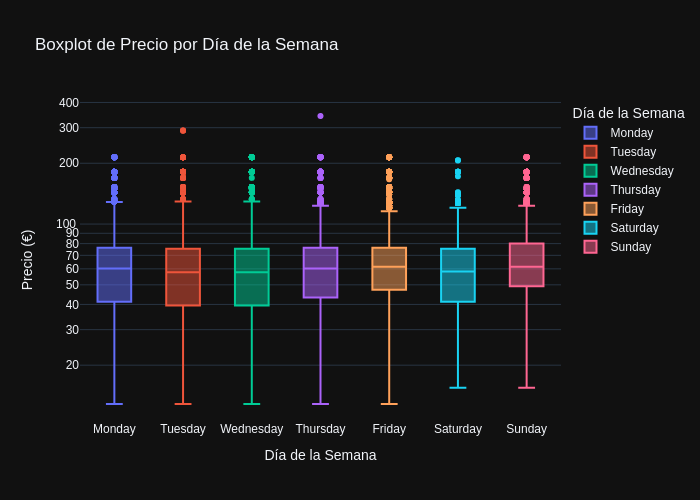

In [75]:
# Crear el boxplot con Plotly
fig = px.box(df, x='nombre_dia', y='precio',
             title='Boxplot de Precio por Día de la Semana',
             labels={'nombre_dia': 'Día de la Semana', 'precio': 'Precio (€)'},
             color="nombre_dia",
             category_orders={'nombre_dia': orden_dias})

# Ajustar la escala del eje y a logarítmica ya que tengo varios atipicos que me rompen un poco la escala.
fig.update_layout(yaxis_type="log")

# Actualizar el formato de los ticks en el eje y para que se muestren en formato legible
fig.update_yaxes(tickformat=".0f")

# Mostrar el boxplot
fig.show("png")

A simple visto podemos ver que no hay mucha diferencia de precio entre los dias de la semana.

### P14.3: Gráfica el precio medio por día de la semana

In [76]:
# Calcular el precio medio por día de la semana
mean_prices = df.groupby('nombre_dia')['precio'].mean().reset_index()

In [77]:
df

,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes,mes,nombre_dia,hora_minuto,latitud,longitud
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28,June,Friday,20:36,40.416705,-3.703582
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14,July,Sunday,10:00,40.416705,-3.703582
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23,May,Thursday,13:40,40.416705,-3.703582
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29,May,Wednesday,14:50,40.416705,-3.703582
4,SEVILLA,MADRID,AVE,Promo,Turista,60.30,150,21,July,Sunday,08:45,40.416705,-3.703582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382190,MADRID,PONFERRADA,AVE-LD,Promo,Turista con enlace,31.20,252,4,June,Tuesday,14:40,42.545412,-6.593872
382191,MADRID,PONFERRADA,ALVIA,Promo,Turista,33.50,243,22,July,Monday,17:30,42.545412,-6.593872
382192,MADRID,PONFERRADA,AVE-LD,Promo,Turista con enlace,37.45,252,22,May,Wednesday,14:40,42.545412,-6.593872
382193,MADRID,PONFERRADA,LD,Flexible,Turista con enlace,57.00,252,27,July,Saturday,14:40,42.545412,-6.593872


In [78]:
mean_prices

,nombre_dia,precio
0,Friday,65.377954
1,Monday,61.050796
2,Saturday,57.914037
3,Sunday,67.219358
4,Thursday,60.748288
5,Tuesday,58.019662
6,Wednesday,59.149636


In [79]:
# Ordenar el DataFrame por la columna 'precio' en orden ascendente
mean_prices = mean_prices.sort_values(by='precio', ascending=False)

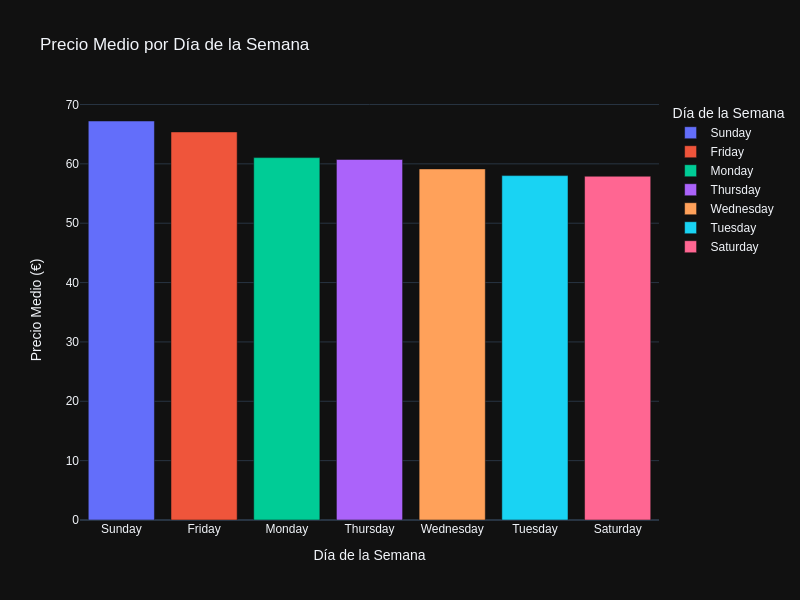

In [80]:
# Crear el gráfico de barras con Plotly
fig = px.bar(mean_prices, x='nombre_dia', y='precio',
             title='Precio Medio por Día de la Semana',
             labels={'nombre_dia': 'Día de la Semana', 'precio': 'Precio Medio (€)'},
             color= "nombre_dia",
             height=600,
             width=800)

# Mostrar el gráfico
fig.show("png")

Podemos ver que los dias mas caros son domingo y viernes, y que el dia mas barato es el sábado.

In [81]:
# Quiero saber que dias hubo mas viajes, creo un dataframe con el conteo de los billetes por dia.
conteo_dias = df['nombre_dia'].value_counts().reset_index()

In [82]:
conteo_dias

,nombre_dia,count
0,Thursday,59441
1,Friday,58025
2,Tuesday,57543
3,Wednesday,57299
4,Monday,56595
5,Sunday,52701
6,Saturday,40591


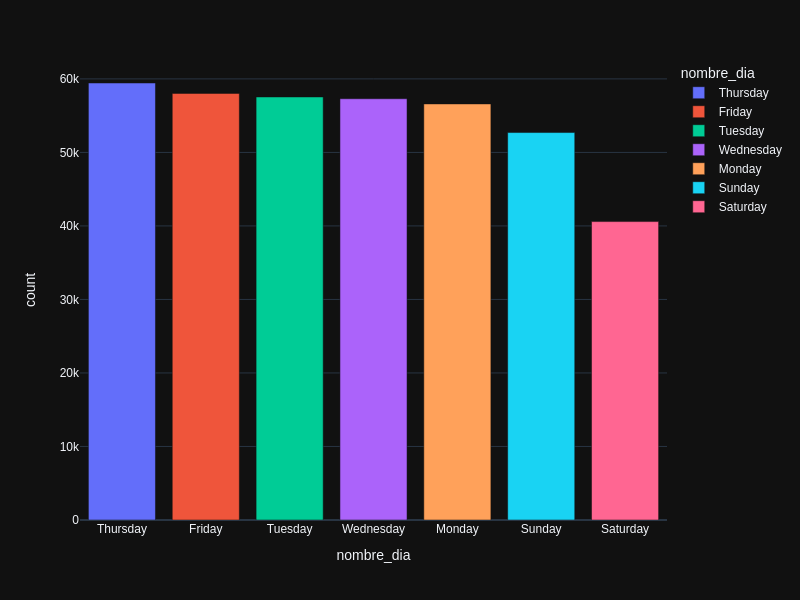

In [83]:
# Crear el gráfico de barras con Plotly
fig = px.bar(conteo_dias, x="nombre_dia", y="count", color="nombre_dia",
             height=600,
             width=800)


# Mostrar el gráfico
fig.show("png")

He querido comprobar el numero de billetes por dia de la semana, y podemos ver que el sabado es significativamente el dia que menos billetes vende, y que el martes el que mas.

## P15: Crea un nuevo dataframe longe apliques *one-hot-encoding* a las variables categoricas

In [84]:
df.head()

,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,tiempo_viaje,dia_mes,mes,nombre_dia,hora_minuto,latitud,longitud
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158,28,June,Friday,20:36,40.416705,-3.703582
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190,14,July,Sunday,10:00,40.416705,-3.703582
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150,23,May,Thursday,13:40,40.416705,-3.703582
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460,29,May,Wednesday,14:50,40.416705,-3.703582
4,SEVILLA,MADRID,AVE,Promo,Turista,60.30,150,21,July,Sunday,08:45,40.416705,-3.703582


In [85]:
# Cambio configuracion de pandas para mostrar todas las columnas.
pd.set_option('display.max_columns', None)

In [86]:
df.mes.unique()

array(['June', 'July', 'May', 'August', 'September', 'October', 'April'],
      dtype=object)

In [87]:
# Uso one-hot-encoding para las variables categoricas menos las ciudades.

df_long = pd.get_dummies(df, columns =['nombre_dia',"tipo_tren","clase","tipo_tarifa","mes"], prefix=['dia', 'tipo','clase','tarifa',"mes"], prefix_sep='_')

In [88]:
df_long

,ciudad_origen,ciudad_destino,precio,tiempo_viaje,dia_mes,hora_minuto,latitud,longitud,dia_Friday,dia_Monday,dia_Saturday,dia_Sunday,dia_Thursday,dia_Tuesday,dia_Wednesday,tipo_ALVIA,tipo_AV City,tipo_AVE,tipo_AVE-LD,tipo_AVE-MD,tipo_AVE-TGV,tipo_INTERCITY,tipo_LD,tipo_LD-AVE,tipo_LD-MD,tipo_MD,tipo_MD-AVE,tipo_MD-LD,tipo_R. EXPRES,tipo_REGIONAL,tipo_TRENHOTEL,clase_Cama G. Clase,clase_Cama Turista,clase_Preferente,clase_PreferenteSólo plaza H,clase_Turista,clase_Turista Plus,clase_Turista PlusSólo plaza H,clase_Turista con enlace,clase_TuristaSólo plaza H,tarifa_Adulto ida,tarifa_COD.PROMOCIONAL,tarifa_Doble Familiar-Flexible,tarifa_Flexible,tarifa_Grupos Ida,tarifa_Individual-Flexible,tarifa_Mesa,tarifa_Promo,tarifa_Promo +,mes_April,mes_August,mes_July,mes_June,mes_May,mes_October,mes_September
0,SEVILLA,MADRID,67.20,158,28,20:36,40.416705,-3.703582,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,BARCELONA,MADRID,107.70,190,14,10:00,40.416705,-3.703582,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,SEVILLA,MADRID,47.30,150,23,13:40,40.416705,-3.703582,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,VALENCIA,MADRID,28.35,460,29,14:50,40.416705,-3.703582,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,SEVILLA,MADRID,60.30,150,21,08:45,40.416705,-3.703582,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382190,MADRID,PONFERRADA,31.20,252,4,14:40,42.545412,-6.593872,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
382191,MADRID,PONFERRADA,33.50,243,22,17:30,42.545412,-6.593872,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
382192,MADRID,PONFERRADA,37.45,252,22,14:40,42.545412,-6.593872,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
382193,MADRID,PONFERRADA,57.00,252,27,14:40,42.545412,-6.593872,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,